In [30]:
import numpy as np
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import networkx as nx

## Matrix Analysis Functions

In [31]:
# returns the sum of the [0,n) powers of M
def sum_of_powers(M, n):
    result = np.zeros(M.shape)
    for i in range(n):
        result += matrix_power(M, i)
    return result

# Returns whether or not given square, positive matrix is irreducible
def is_irreducible(M):
    Mk = sum_of_powers(M, M.shape[0])
    return not np.any(Mk == 0)

# Returns whether or not given node in given square, positive matrix is globally reachable
def is_node_globally_reachable(M, i):
    power_sum = sum_of_powers(M, M.shape[0])
    return not np.any(power_sum[:,i] == 0) 

# Reutrns whether of not a given square, postiive matrix is postiive.
def is_positive(M):
    return not np.any(matrix_power(M, M.shape[0]) == 0)

## Plotting and Drawing Functions

In [56]:

def plot_matrix_powers(M, name):
    n = M.shape[0]
    fig, axs = plt.subplots(1, n, figsize= (15, n*15))
    blue_map = ListedColormap(["blue", "white"])
    
    for i in range(n):
        zeros=  matrix_power(M, i+1) == 0
        im = axs[i].imshow(zeros, cmap=blue_map)
        
        axs[i].set(title='${}^{{{}}}$'.format(name, i+1))
        plt.setp(axs[i].get_xticklabels(), visible=False)
        plt.setp(axs[i].get_yticklabels(), visible=False)
        axs[i].tick_params(axis='both', which='both', length=0)
    plt.show()
    

def draw_adj_matrix(A):
    plt.plot()
    G = nx.DiGraph()
    for i in range(len(A)):
        for j in range(len(A[i])):
            if(A[i,j]):
                G.add_edge(i,j)

    nx.draw_networkx(G, node_size=1000)



### Make Random Graphs

In [57]:
n = 7
p=1./3

# Randomly generate reducible adjacency matrix
A = np.random.choice([0, 1], size=(n,n), p=[1-p, p])
while(is_irreducible(A)):
    A = np.random.choice([0, 1], size=(n,n), p=[1-p, p])

# Randomly generate irreducible, but not positive, matrix
B = np.random.choice([0, 1], size=(n,n), p=[1-p, p])
while(not is_irreducible(B) or is_positive(B)):
    B= np.random.choice([0, 1], size=(n,n), p=[1-p, p])

# Randomly generate postiive matrix
C = np.random.choice([0, 1], size=(n,n), p=[1-p, p])
while(not is_positive(C)):
    C= np.random.choice([0, 1], size=(n,n), p=[1-p, p])
    
matrices = [A,B,C]
names = ["A","B", "C"]

## Make Plots

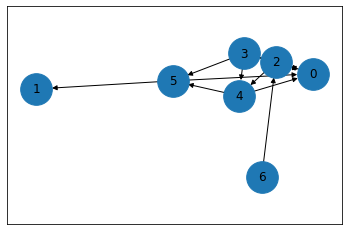

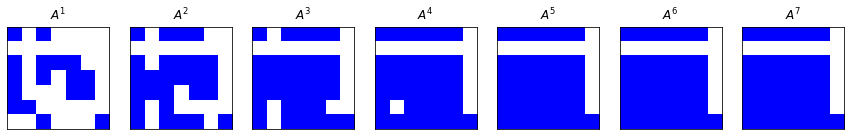

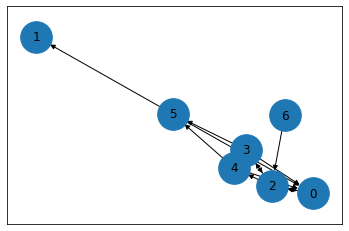

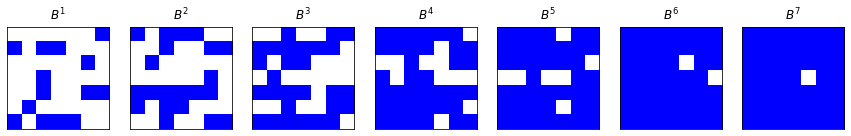

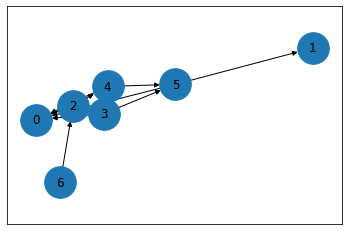

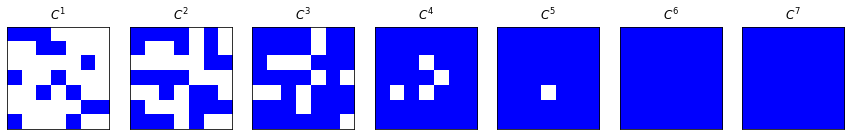

In [59]:
for i, M in enumerate(matrices):
    draw_adj_matrix(A)
    plot_matrix_powers(M, names[i])